<a href="https://colab.research.google.com/github/cyrus723/my-first-binder/blob/main/FRED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using the FRED API to get and display key macro series
FRED, a database maintained by the Federal Reserve Bank of St. Louis, is a great, realiable source of macroecononomic and financial data. One can manually access it, download the needed data and manipulate it, but Python makes the process much easier and replicable. For one very current illustration, let us see using recent data if we can see evidence that changes in presidential administrations have a noticeable impact on the economy. Given the current climate, this notebook will just plot numbers. You can decide for yourself whether there is any inflection of note in those series.

The first step is to install the FRED API.

In [1]:
pip install fredapi 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from fredapi import Fred 

Next we will download the FRED API, ask the FED for an ID (go here https://research.stlouisfed.org/useraccount/apikeys), and enter it.

In [3]:
##############   please get your own API KEY instead of using mine   ####################
fred = Fred(api_key='52b55ac11946f5749148befd9094e6bf')

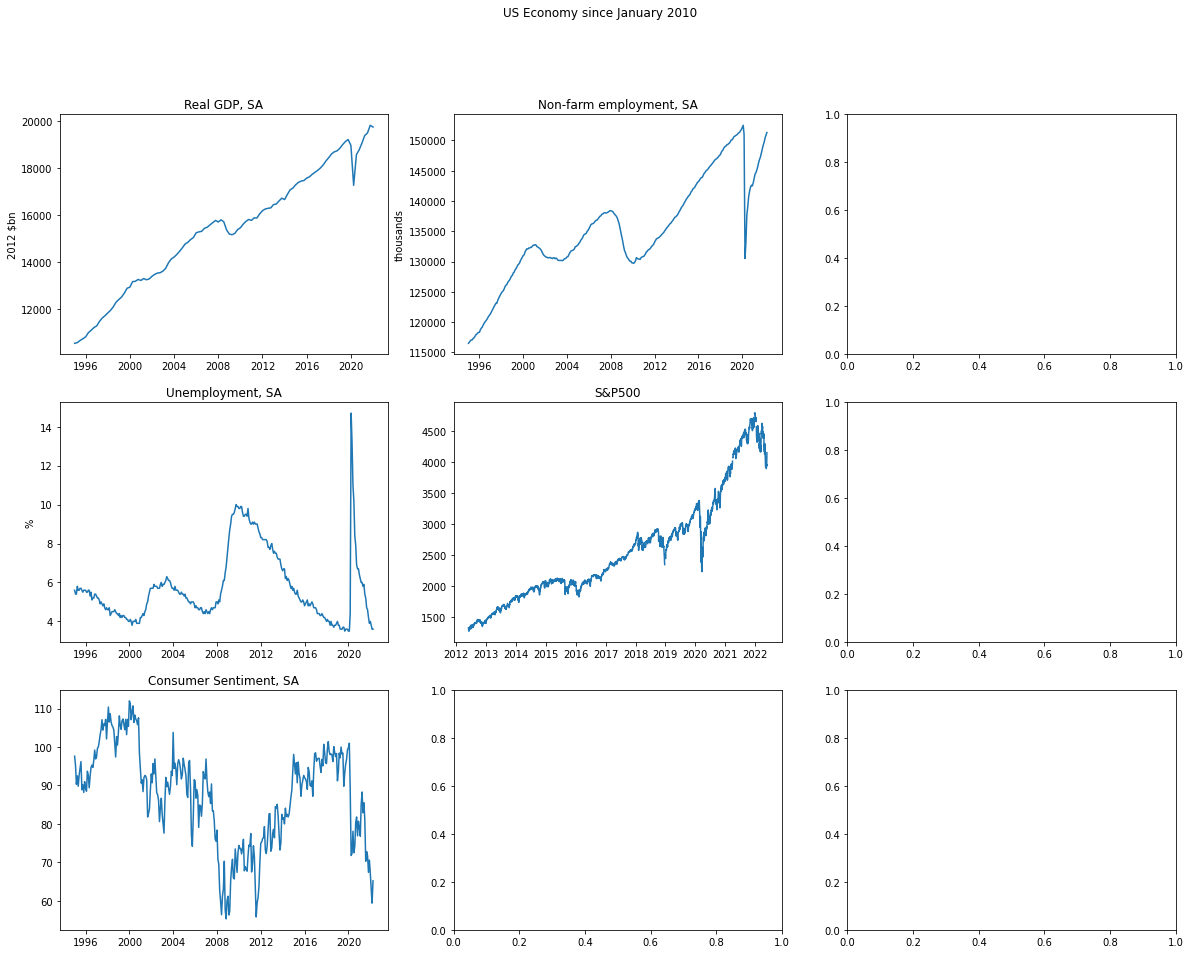

In [4]:
empl = fred.get_series('PAYEMS', observation_start='1995-1-1') # seasonally ajusted non-farm employment in thousands 
gdp = fred.get_series('GDPC1', observation_start='1995-1-1') # Seasonally adjusted real GDP # seasonally ajusted non-fram employment in thousands
unemp =fred.get_series('UNRATE', observation_start='1995-1-1') # seasonally ajusted unemployment rate in percent
SP500=fred.get_series('SP500', observation_start='1995-1-1')  # only starts in 2010 at Fred for some reason
consumer_confidence=fred.get_series('UMCSENT', observation_start='1995-1-1') 




import matplotlib.pyplot as plt #graphing module with matlab-like properties
%matplotlib inline 

fig, axs  = plt.subplots(3, 3,figsize=(20, 15))
fig.suptitle('US Economy since January 2010')

# plt.subplot(221)

axs[0][0].plot(gdp.index,gdp.values)
axs[0][0].set_title("Real GDP, SA")
axs[0,0].set_ylabel("2012 $bn")

axs[0][1].plot(empl.index,empl.values)
axs[0][1].set_title("Non-farm employment, SA")
axs[0,1].set_ylabel("thousands")

axs[1][0].plot(unemp.index,unemp.values)
axs[1][0].set_title("Unemployment, SA")
axs[1,0].set_ylabel("%")

axs[1][1].plot(SP500.index,SP500.values)
axs[1][1].set_title("S&P500")


axs[2][0].plot(consumer_confidence.index,consumer_confidence.values)
axs[2][0].set_title("Consumer Sentiment, SA")




plt.show()

In [ ]:
type(gdp)

pandas.core.series.Series

In [ ]:
consumer_confidence

1995-01-01    97.6
1995-02-01    95.1
1995-03-01    90.3
1995-04-01    92.5
1995-05-01    89.8
              ... 
2021-10-01    71.7
2021-11-01    67.4
2021-12-01    70.6
2022-01-01    67.2
2022-02-01    62.8
Length: 326, dtype: float64

#https://fred.stlouisfed.org/docs/api/fred/#General_Documentation

Search for data series
You can always search for data series on the FRED website. But sometimes it can be more convenient to search programmatically. fredapi provides a search() method that does a fulltext search and returns a DataFrame of results.

In [ ]:
fred.search('consumer confidence')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UMCSENT,UMCSENT,2022-04-07,2022-04-07,University of Michigan: Consumer Sentiment,1952-11-01,2022-02-01,Monthly,M,Index 1966:Q1=100,Index 1966:Q1=100,Not Seasonally Adjusted,NSA,2022-03-25 10:01:02-05:00,78,"At the request of the source, the data is dela..."
MICH,MICH,2022-04-07,2022-04-07,University of Michigan: Inflation Expectation,1978-01-01,2022-02-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-03-25 10:01:12-05:00,70,"Median expected price change next 12 months, S..."
CSCICP03USM665S,CSCICP03USM665S,2022-04-07,2022-04-07,Consumer Opinion Surveys: Confidence Indicator...,1960-01-01,2022-02-01,Monthly,M,Normalised (Normal=100),Normalised (Normal = 100),Seasonally Adjusted,SA,2022-03-10 10:39:06-06:00,49,OECD descriptor ID: CSCICP03 OECD unit ID: IXN...
CSCICP03EZM665S,CSCICP03EZM665S,2022-04-07,2022-04-07,Consumer Opinion Surveys: Confidence Indicator...,1973-01-01,2022-02-01,Monthly,M,Normalised (Normal=100),Normalised (Normal = 100),Seasonally Adjusted,SA,2022-03-10 10:47:08-06:00,22,OECD descriptor ID: CSCICP03 OECD unit ID: IXN...
UMCSENT1,UMCSENT1,2022-04-07,2022-04-07,University of Michigan: Consumer Sentiment (DI...,1952-11-01,1977-11-01,Not Applicable,NA,Index 1966:Q1=100,Index 1966:Q1=100,Not Seasonally Adjusted,NSA,2004-01-12 12:08:18-06:00,22,Please see FRED data series UMCSENT for monthl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCDIOA17460Q156N,CCDIOA17460Q156N,2022-04-07,2022-04-07,CredAbility Consumer Distress Index for Clevel...,2005-01-01,2013-01-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2013-05-17 14:01:30-05:00,1,Overview of the Index The Index is a quarterly...
CCDIOA26420Q156N,CCDIOA26420Q156N,2022-04-07,2022-04-07,CredAbility Consumer Distress Index for Housto...,2005-01-01,2013-01-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2013-05-17 14:01:32-05:00,1,Overview of the Index The Index is a quarterly...
CCDIOA37100Q156N,CCDIOA37100Q156N,2022-04-07,2022-04-07,CredAbility Consumer Distress Index for Oxnard...,2005-01-01,2013-01-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2013-05-17 14:01:50-05:00,1,Overview of the Index The Index is a quarterly...


You can also search by release id and category id with various options

In [ ]:
df1 = fred.search_by_release(11)
df2 = fred.search_by_category(101, limit=10, order_by='popularity', sort_order='desc')

In [ ]:
df1

In [ ]:
df2

In [ ]:
info = fred.get_series_info('PAYEMS')
info['title']

'All Employees, Total Nonfarm'

In [ ]:
s = fred.get_series('SP500', observation_start='1/31/2014')
s.tail()

2022-03-30    4602.45
2022-03-31    4530.41
2022-04-01    4545.86
2022-04-04    4582.64
2022-04-05    4525.12
dtype: float64

In [ ]:
s = fred.get_series('SP500', observation_start='2014-09-02', observation_end='2014-09-05')
s.tail()

2014-09-02    2002.28
2014-09-03    2000.72
2014-09-04    1997.65
2014-09-05    2007.71
dtype: float64

You can also get a set of series IDs programmatically by release or category IDs. Several sorting options are also available. On the FRED website I know that the release ID 175 contains some personal income data. Let's fetch 5 most popular series in that set.

In [ ]:
personal_income_series = fred.search_by_release(175, limit=10, order_by='popularity', sort_order='desc')
personal_income_series['title']

series id
PCPI06037      Per Capita Personal Income in Los Angeles Coun...
SEAT653PCPI    Per Capita Personal Income in Seattle-Tacoma-B...
DALL148PCPI    Per Capita Personal Income in Dallas-Fort Wort...
ATLA013PCPI    Per Capita Personal Income in Atlanta-Sandy Sp...
SANF806PCPI    Per Capita Personal Income in San Francisco-Oa...
PCPI06073      Per Capita Personal Income in San Diego County...
PCPI12086      Per Capita Personal Income in Miami-Dade Count...
HOUS448PCPI    Per Capita Personal Income in Houston-The Wood...
SANA748PCPI    Per Capita Personal Income in San Antonio-New ...
PHOE004PCPI    Per Capita Personal Income in Phoenix-Mesa-Sco...
Name: title, dtype: object

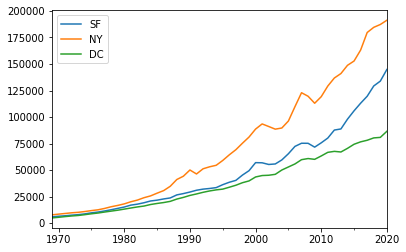

In [ ]:
import pandas as pd
df = {}
df['SF'] = fred.get_series('PCPI06075')
df['NY'] = fred.get_series('PCPI36061')
df['DC'] = fred.get_series('PCPI11001')
df = pd.DataFrame(df)
df.plot()